# 1. Problem Definition
For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

# 2. Data
Looking at the dataset from Kaggle, you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

# 3.  Evaluation
For this problem, Kaggle has set the evaluation metric to being root mean squared log error (RMSLE). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.

# 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

For this dataset, Kaggle provides a data dictionary which contains information about what each attribute of the dataset means. You can download this file directly from the Kaggle competition page or view it on Google Sheets.

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

## EDA (explotary data analysis)

In [2]:
# import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# import our data
df = pd.read_csv("data/data/TrainAndValid.csv")
df.head()

C:\Users\ALI\AppData\Local\Temp\ipykernel_6304\744850505.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data/TrainAndValid.csv")


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [82]:
#import dataset parsing the date column
df_t = pd.read_csv("data/data/TrainAndValid.csv", parse_dates=['saledate'],low_memory=False )
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [83]:
# create columns with year and months from saledate column
df_t['month'] = df_t.saledate.dt.month
df_t['year'] = df_t.saledate.dt.year
df_t.head(5).T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


<AxesSubplot:>

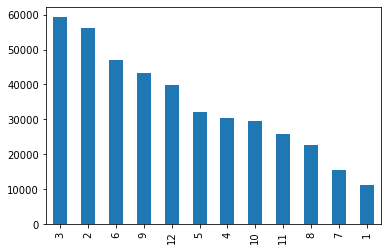

In [84]:
# how was the sales performance per each month
df_t["month"].value_counts().plot.bar()

<AxesSubplot:>

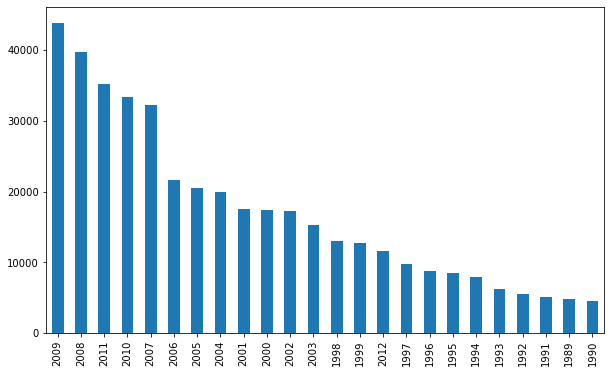

In [7]:
#how was the sales performance per the given years
plt.figure(figsize=(10,6))
df_t["year"].value_counts().plot.bar()

<AxesSubplot:>

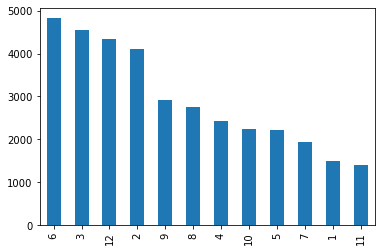

In [8]:
#how was the sales peformance for each month in 2011 
df_t[df_t["year"] == 2011]["month"].value_counts().plot.bar()

<AxesSubplot:>

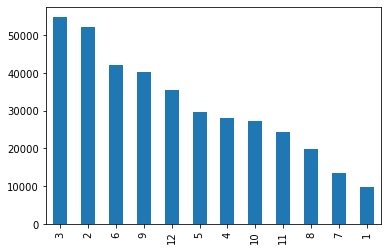

In [9]:
#how was the sales performance for each month in the validation dataset
df_t[df_t["year"] != 2011]["month"].value_counts().plot.bar()

<AxesSubplot:>

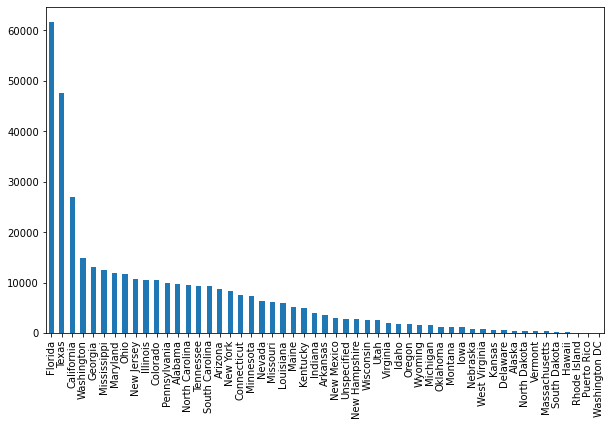

In [10]:
# how were the sales as per state for the different years
plt.figure(figsize=(10,6))
df_t[df_t["year"] != 2011]["state"].value_counts().plot.bar()

# Modelling

In [85]:
df_t["saleDay"] = df_t.saledate.dt.day
df_t["saleDayofweek"] = df_t.saledate.dt.dayofweek
df_t["saleDayofyear"] = df_t.saledate.dt.dayofyear

# Drop original saledate
df_t.drop("saledate", axis=1, inplace=True)

In [12]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [13]:
# lets model since we have the data, a good candidate for this would be RandomForestRegressor() from the scikit-learn machine learning map
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=1)
model.fit(df_t.drop('SalePrice',axis=1),df_t['SalePrice'])

ValueError: could not convert string to float: 'Low'

In [14]:
df_t.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [15]:
# convert strings to numbers
# first convert strings to category datatype
# we shall use the pandas type api that allows us to interact and manipulate the types of data
pd.api.types.is_string_dtype(df_t['UsageBand'])

True

In [86]:
for label,content in df_t.items():
    if pd.api.types.is_string_dtype(content):
        
        df_t[label] = content.astype("category").cat.as_ordered()

In [17]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [18]:
df_t.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [19]:
df_t.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [87]:
# now lets work on missing values before we can convert categories to numbers
# lets fill the missing on the columns that are numerical with median
for label,content in df_t.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            ## add a binary column to show if data was missing or not
            df_t[label+"_is_missing"] = pd.isnull(content)
            ## fill missing values with median
            df_t[label] = content.fillna(content.median)


In [88]:
# # now lets check if there are any missing values
for label,content in df_t.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [89]:
# # now lets convert categorical variables to numbers
for label,content in df_t.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_t[label+"_is_missing"] = pd.isnull(content)
        df_t[label] = pd.Categorical(content).codes+1

In [23]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(5), int64(10), int8(41)
memory usage: 72.8 MB


In [24]:
df_t.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [25]:
df_t.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


### fitting model , tunning model and predicting using the test data 

In [90]:
# split our data into training and validatio
df_valid = df_t[df_t['year'] == 2012]
df_train = df_t[df_t['year'] != 2012]
len(df_valid), len(df_train)

(11573, 401125)

In [169]:
# split data into x$y features and labels
x_train, y_train = df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_valid, y_valid = df_valid.drop("SalePrice", axis=1),df_valid["SalePrice"]
x_train.shape, y_train.shape, x_valid.shape,y_valid.shape


((401125, 102), (401125,), (11573, 102), (11573,))

In [170]:
# building evaluation function
from sklearn.metrics import mean_squared_log_error

# function to  return RMSLE(squareroot of mean_squared_log_error)
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# function to evaluate the model
def show_score(model):
    val_pred = model.predict(x_valid)
    score = {"valid RMSLE":rmsle(y_valid,val_pred)}
    return score

In [171]:
## now lets train our model with 10,000 samples
model = RandomForestRegressor(n_jobs=-1,
                             max_samples=10000)

In [172]:
%%time
model.fit(x_train,y_train)

CPU times: total: 1min 28s
Wall time: 36.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [173]:
show_score(model)

{'valid RMSLE': 0.29300868591490037}

In [43]:
%%time
## lets improve our model by hyperparameter tunning using randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0`

C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0`

CPU times: total: 12min 7s
Wall time: 12min 15s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [174]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [175]:
show_score(rs_model)

{'valid RMSLE': 0.3026195260183778}

In [176]:
%%time
### training our model with the best parameters

ideal_model = RandomForestRegressor(n_estimators=20,
                                   min_samples_split=6,
                                   min_samples_leaf=7,
                                   max_features='auto',
                                   max_depth=None,
                                   n_jobs=-1)
ideal_model.fit(x_train,y_train)

C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 5min 49s
Wall time: 1min 58s


RandomForestRegressor(max_features='auto', min_samples_leaf=7,
                      min_samples_split=6, n_estimators=20, n_jobs=-1)

In [178]:
show_score(ideal_model)

{'valid RMSLE': 0.25514138610276044}

In [179]:
%%time
### training our model with the best parameters

fast_model = RandomForestRegressor(n_estimators=30,
                                   min_samples_split=6,
                                   min_samples_leaf=7,
                                   max_features='auto',
                                   max_depth=None,
                                   n_jobs=-1)
fast_model.fit(x_train,y_train)

C:\Users\ALI\MLprojects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 8min 38s
Wall time: 3min 5s


RandomForestRegressor(max_features='auto', min_samples_leaf=7,
                      min_samples_split=6, n_estimators=30, n_jobs=-1)

In [180]:
show_score(fast_model)

{'valid RMSLE': 0.2525528429841453}

In [93]:
## lets now make predictions on the test data since we have a trained model

test_data = pd.read_csv("data/data/Test.csv", parse_dates=["saledate"])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [94]:
## lets preprocess our data 
## Whatever you do to the training data, you have to do to the test data.
def preprocess_data(df_t):
    df_t['month'] = df_t.saledate.dt.month
    df_t['year'] = df_t.saledate.dt.year
    df_t["saleDay"] = df_t.saledate.dt.day
    df_t["saleDayofweek"] = df_t.saledate.dt.dayofweek
    df_t["saleDayofyear"] = df_t.saledate.dt.dayofyear

    # Drop original saledate
    df_t.drop("saledate", axis=1, inplace=True)
    # convert object to catergory
    for label,content in df_t.items():
        if pd.api.types.is_string_dtype(content):
        
            df_t[label] = content.astype("category").cat.as_ordered()
    
    for label,content in df_t.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            
                ## add a binary column to show if data was missing or not
                df_t[label+"_is_missing"] = pd.isnull(content)
                ## fill missing values with median
                df_t[label] = content.fillna(content.median)
    # # now lets convert categorical variables to numbers
    for label,content in df_t.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_t[label+"_is_missing"] = pd.isnull(content)
            df_t[label] = pd.Categorical(content).codes+1 
            
    return df_t        

In [95]:
test_data_pro = preprocess_data(test_data)

In [183]:
set(x_train) - set(test_data_pro)

{'auctioneerID_is_missing'}

In [184]:
test_data_pro["auctioneerID"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12457 entries, 0 to 12456
Series name: auctioneerID
Non-Null Count  Dtype
--------------  -----
12457 non-null  int64
dtypes: int64(1)
memory usage: 97.4 KB


In [185]:
test_data_pro['auctioneerID_is_missing'] = False

In [186]:
len(test_data_pro.columns), len(x_train.columns)

(102, 102)

In [187]:
set(x_train) - set(test_data_pro), set(test_data_pro)-set(x_train)

(set(), set())

In [188]:
# ### reoder test data the columns to match the train data
test_data_pro = test_data_pro[x_train.columns]

In [189]:
# ## now all our dataframes have same features, time to predict
test_preds = fast_model.predict(test_data_pro)

In [190]:
# Create DataFrame compatible with Kaggle submission requirements 
df_kagg = pd.DataFrame()
df_kagg['SalesID'] = test_data["SalesID"]
df_kagg['SalePrice'] = test_preds
df_kagg

,SalesID,SalePrice
0,1227829,21277.646982
1,1227844,18121.253637
2,1227847,49751.559221
3,1227848,87895.857983
4,1227863,56633.168488
...,...,...
12452,6643171,61071.552858
12453,6643173,11278.464311
12454,6643184,11569.579139
12455,6643186,16888.575738


In [191]:
### feature importance, which features where most important predicting the price
fast_model.feature_importances_

array([4.50942488e-02, 1.06039097e-02, 3.13311738e-02, 1.15036857e-04,
       2.26669917e-03, 2.77057228e-01, 1.58226497e-03, 8.53575350e-04,
       1.96260755e-02, 8.79733376e-02, 5.32633899e-02, 3.92557408e-03,
       3.14954390e-03, 2.42230202e-01, 3.96673561e-02, 4.98718859e-03,
       1.36734644e-04, 1.26863089e-04, 1.82035885e-03, 7.76491303e-03,
       1.63291367e-04, 2.18145691e-05, 3.61646456e-04, 1.80852533e-04,
       1.35083719e-03, 5.69065866e-06, 4.84004752e-06, 2.82860215e-03,
       9.36858777e-05, 1.24046292e-05, 2.33837295e-03, 2.57350690e-03,
       1.81996161e-03, 3.83083534e-03, 1.35312396e-04, 1.35737981e-03,
       4.56998475e-04, 1.60267540e-02, 2.79305588e-06, 4.50374649e-07,
       1.34688442e-04, 8.21322230e-04, 8.74268232e-04, 3.84524527e-04,
       1.30323762e-04, 1.84000230e-04, 2.03658445e-04, 1.08548350e-03,
       7.51482103e-04, 1.11008235e-04, 1.92440257e-04, 1.47989080e-03,
       7.82310162e-02, 4.57224674e-03, 2.13263078e-03, 1.05225386e-02,
      

In [162]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    fig,ax = plt.subplots(figsize=(10,6))
    sns.barplot(ax=ax,
                x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

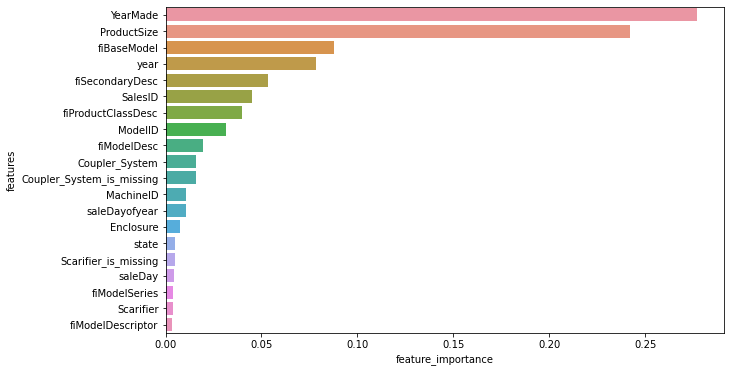

In [192]:
plot_features(x_train.columns, fast_model.feature_importances_)